In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import numpy as np


#SQLAlchemy dependencies
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_

In [4]:
#creating connection engine and inspector
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
#Exploring the two tables
print('----- Measurement Table Headers -----')
for column_name in inspector.get_columns('measurement'):
    print(column_name['name'])
    
print('----- Station Table Headers -----')
for column_name in inspector.get_columns('station'):
    print(column_name['name'])

----- Measurement Table Headers -----
id
station
date
prcp
tobs
----- Station Table Headers -----
id
station
name
latitude
longitude
elevation


In [6]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

In [12]:
start_date = dt(2016,8,30)
end_date = dt(2017,8,31)

Precipitation Analysis

In [14]:
precip = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).\
    filter(and_(Measurement.date>start_date, Measurement.date<end_date)).all()

In [15]:
precip[0]

('2016-08-31', 0.13)

In [16]:
measure_df = pd.DataFrame(precip).set_index('date').sort_values(by=['date'], ascending=True)
a = measure_df.index.tolist()
b = measure_df['prcp'].tolist()

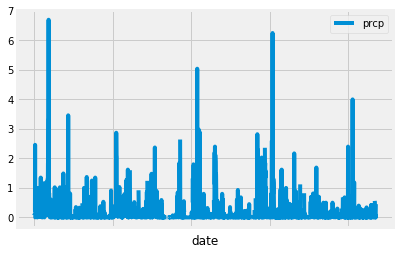

In [17]:
measure_df.plot()

In [18]:
measure_df.describe()

,prcp
count,1973.000000
mean,0.172656
std,0.454185
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


STATION ANALYSIS

In [19]:
#Listing the stations and observation counts in descending order
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Station with the highest number of observations
    # engine.execute('select measurement.station, count(measurement.tobs) from measurement \
    #     inner join station on(measurement.station=station.station) \
    #     group by measurement.station\
    #     order by count(measurement.tobs) desc').fetchall()
session.query(Station.name).filter(Station.station == 'USC00519281').all()

[('WAIHEE 837.5, HI US')]

In [22]:
# Retrieve the last 12 months of temperature observation data for WAIHEE 837.5, HI US
    # engine.execute('select * from measurement where measurement.station="USC00519281" \
    #     order by measurement.date desc').fetchall()
temps = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date.desc()).filter(and_(Measurement.date>start_date, Measurement.date<=end_date)).all()

Text(0, 0.5, 'Frequency')

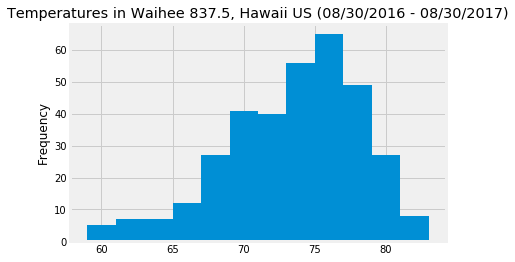

In [23]:
plt.hist(np.array(temps), bins=12)
plt.title('Temperatures in Waihee 837.5, Hawaii US (08/30/2016 - 08/30/2017)')
plt.ylabel('Frequency')